# Students' Academic Performance Dataset
xAPI-Educational Mining Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 귀찮은거
def CheckDf(df: pd.DataFrame):
    line = " ----- " * 10

    print(f"○ shape" + line)
    display(df.shape)
    print("\n\n" + f"○ sample" + line + "\n|")
    display(df.sample(10))
    print("\n\n" + f"○ info()" + line + "\n|")
    display(df.info())
    print("\n\n" + f"○ describe()" + line + "\n|")
    display(df.describe())

    if "object" in df.dtypes.values:
        print("\n\n" + f"○ describe(include='object')" + line + "\n|")
        display(df.describe(include='object'))

    if "category" in df.dtypes.values:
        print("\n\n" + f"○ describe(include='category')" + line + "\n|")
        display(df.describe(include='category'))

# 데이터 가져오기

In [3]:
file = "data\\xAPI-Edu-Data.csv"
df = pd.read_csv(file, index_col=False)
df.sample(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
92,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,50,70,19,15,Yes,Good,Under-7,H
100,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,50,90,40,90,Yes,Bad,Under-7,M
325,M,Syria,Syria,lowerlevel,G-02,A,French,S,Father,27,20,33,35,No,Bad,Under-7,M
245,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,S,Father,50,40,52,66,Yes,Bad,Under-7,M
462,M,Iraq,Iraq,MiddleSchool,G-08,A,History,F,Father,72,87,72,89,Yes,Good,Above-7,M
214,M,KW,KuwaIT,MiddleSchool,G-08,C,Spanish,S,Father,17,50,2,4,No,Bad,Above-7,L
337,F,Palestine,Jordan,lowerlevel,G-02,A,French,S,Mum,75,80,15,20,No,Good,Under-7,M
159,F,KW,KuwaIT,MiddleSchool,G-07,B,Science,S,Father,62,68,48,80,Yes,Good,Under-7,M
57,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,5,2,6,5,Yes,Good,Above-7,L
55,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,16,14,6,20,Yes,Good,Above-7,L


# 데이터 전처리

In [4]:
# NationalITy, PlaceofBirth
## 위 두 컬럼에서 KW와 KuwaIT는 같은 의미이므로 KW를 KuwaIT로 바꿈
print(df["NationalITy"].value_counts()["KW"])
df.loc[df["NationalITy"] == 'KW', "NationalITy"] = 'KuwaIT'
print(df["NationalITy"].value_counts()["KuwaIT"])

179
179


In [ ]:
# OrdinalEncoder
def tmpf(x):
    dict = {"H": 3, "M": 2, "L": 1}
    for i, j in dict.items():
        if x == i:
            x = j
            break
    return x
    
df["Class"] = df["Class"].map(tmpf)
df["Class"].describe()

# EDA
## 수치형

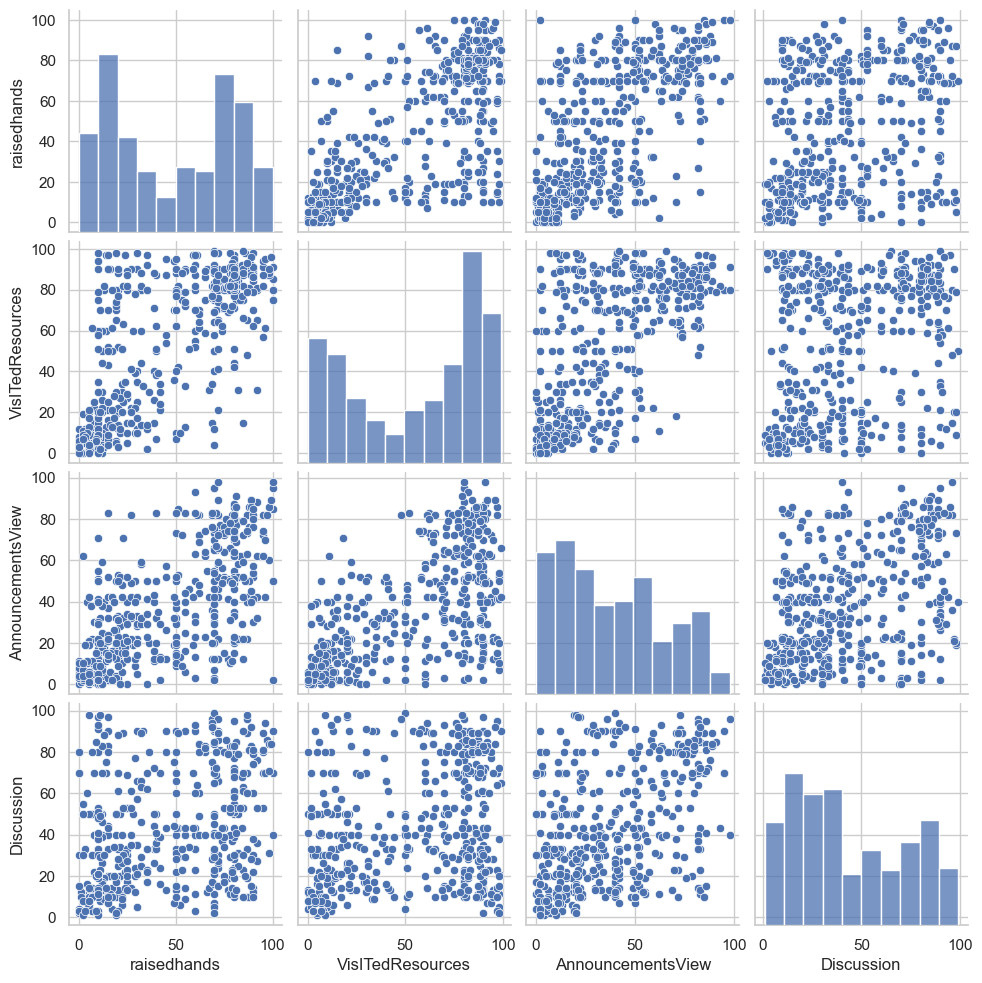

In [46]:
sns.pairplot(df)
plt.show()

In [6]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


<AxesSubplot:xlabel='Discussion', ylabel='Count'>

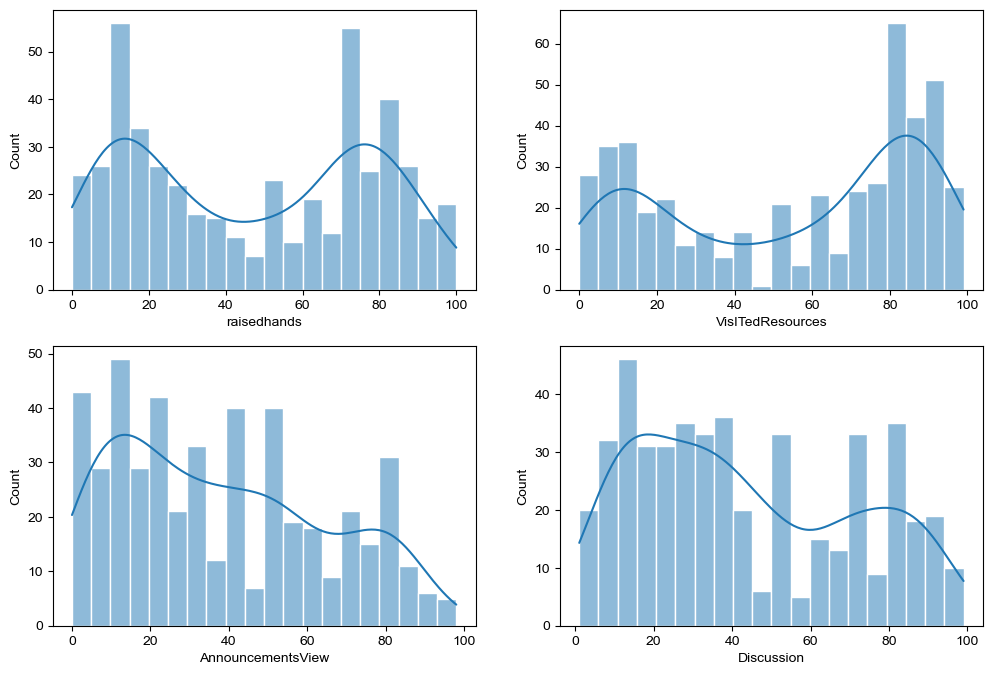

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.set_theme(style='whitegrid')
sns.histplot(data = df, x = 'raisedhands', kde=True, ax=axes[0, 0], bins=20)
sns.histplot(data = df, x = 'VisITedResources', kde=True,ax=axes[0, 1], bins=20)
sns.histplot(data = df, x = 'AnnouncementsView', kde=True, ax=axes[1, 0], bins=20)
sns.histplot(data = df, x = 'Discussion', kde=True,ax=axes[1, 1], bins=20)

<AxesSubplot:>

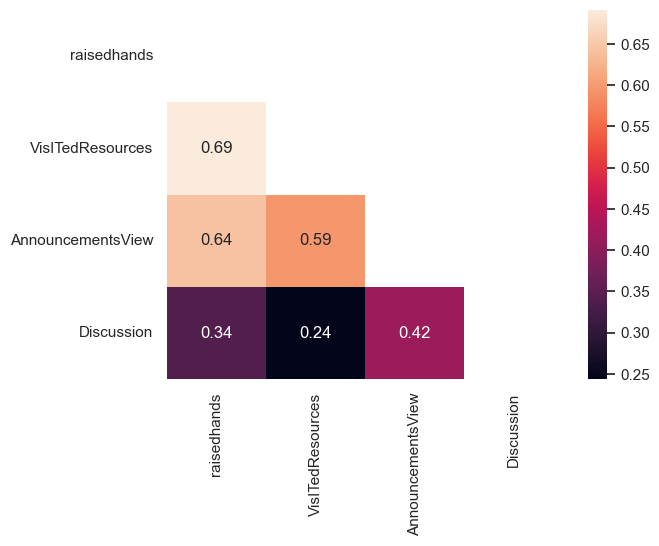

In [8]:
corr = df.corr()
mask= np.triu(np.ones_like(corr))
sns.heatmap(data=corr, mask=mask, annot=True)

## 범주형

In [9]:
df.describe(include="object")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KuwaIT,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

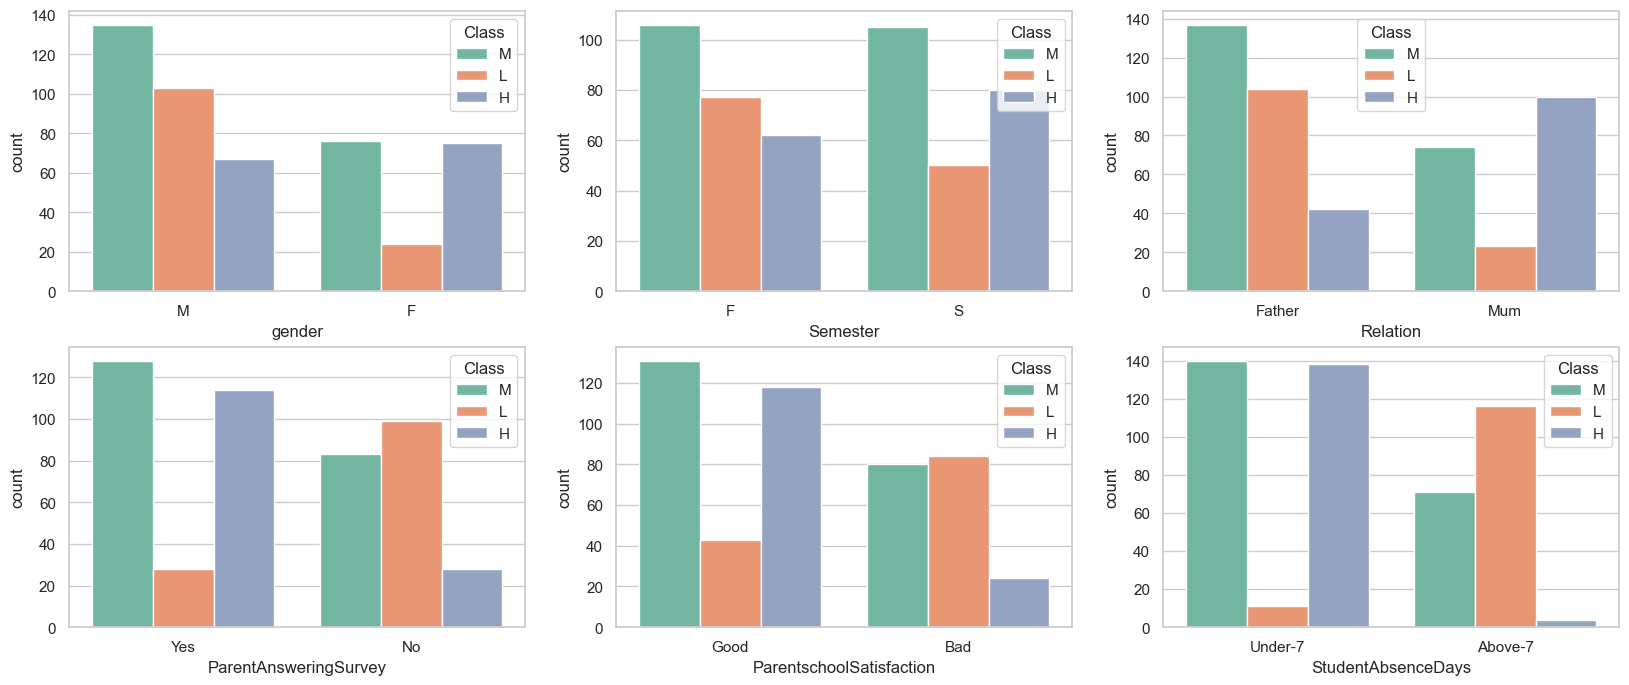

In [40]:
palette = sns.color_palette("Set2")
sns.set_theme(style='whitegrid')


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
sns.set_theme(style='whitegrid')
sns.countplot(data = df, x = 'gender', hue="Class", palette=palette, ax=axes[0, 0])
sns.countplot(data = df, x = 'Semester', hue="Class", palette=palette, ax=axes[0, 1])
sns.countplot(data = df, x = 'Relation', hue="Class", palette=palette, ax=axes[0, 2])
sns.countplot(data = df, x = 'ParentAnsweringSurvey', hue="Class", palette=palette, ax=axes[1, 0])
sns.countplot(data = df, x = 'ParentschoolSatisfaction', hue="Class", palette=palette, ax=axes[1, 1])
sns.countplot(data = df, x = 'StudentAbsenceDays', hue="Class", palette=palette, ax=axes[1, 2])

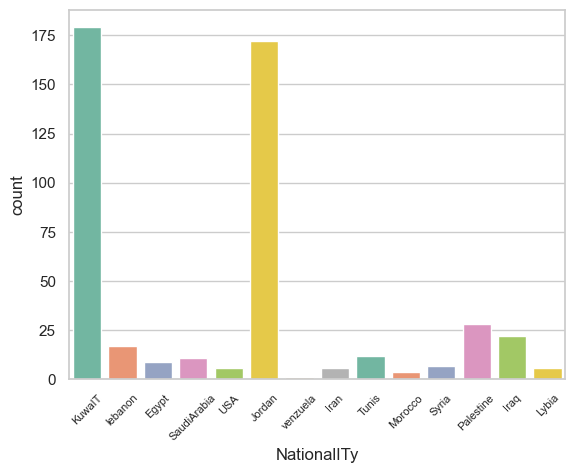

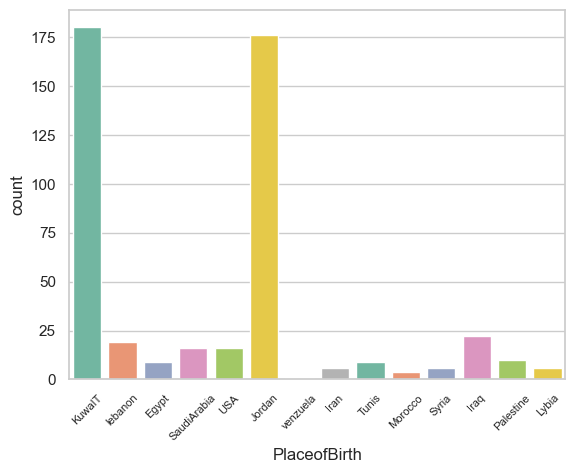

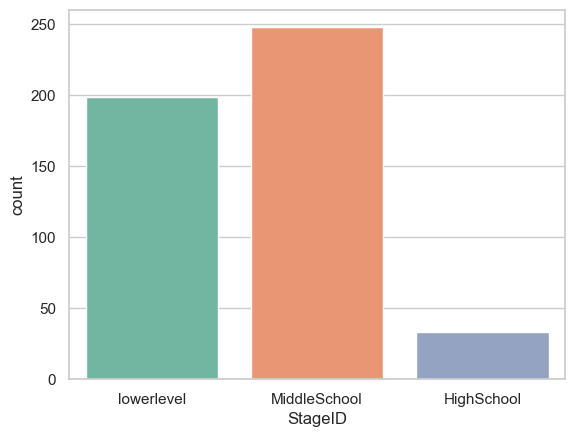

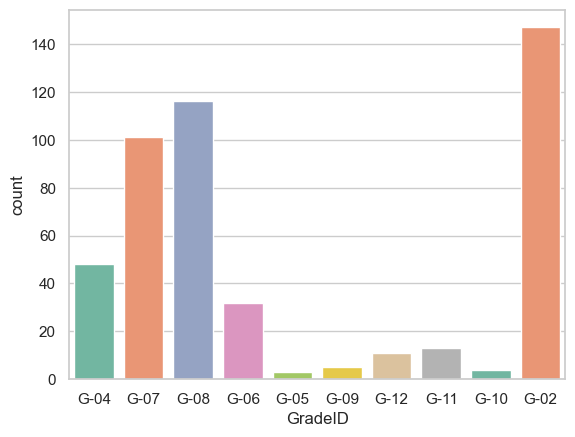

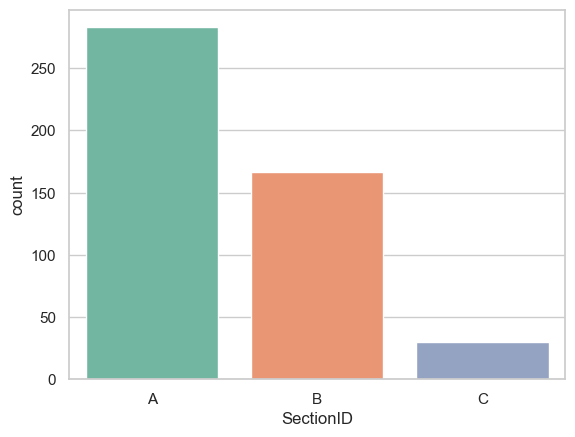

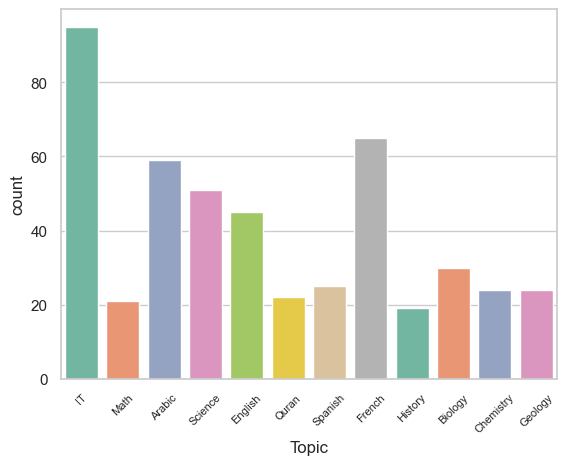

In [43]:
plt.xticks(rotation=45, fontsize=8)
sns.countplot(data = df, x='NationalITy', palette=palette)
plt.show()
plt.xticks(rotation=45, fontsize=8)
sns.countplot(data = df, x = 'PlaceofBirth', palette=palette)
plt.show()
sns.countplot(data = df, x = 'StageID', palette=palette)
plt.show()
sns.countplot(data = df, x = 'GradeID', palette=palette)
plt.show()
sns.countplot(data = df, x = 'SectionID', palette=palette)
plt.show()
plt.xticks(rotation=45, fontsize=8)
sns.countplot(data = df, x = 'Topic', palette=palette)
plt.show()


# Toggle (짬통)

In [ ]:
''' 짬통행
# ParentAnsweringSurvey, ParentschoolSatisfaction
## 위의 두 컬럼은 파생 변수로 묶음 SurveyOfParentschoolSatisfaction
## {0: 미응답, 1: 긍정응답, 2: 부정응답}

df['SurveyOfParentschoolSatisfaction'] = df['ParentAnsweringSurvey']
df.loc[df['ParentAnsweringSurvey'] == "No", 'SurveyOfParentschoolSatisfaction'] = 0
df.loc[df['ParentschoolSatisfaction'] == "Good", 'SurveyOfParentschoolSatisfaction'] = 1
df.loc[df['ParentschoolSatisfaction'] == "Bad", 'SurveyOfParentschoolSatisfaction'] = 2
df['SurveyOfParentschoolSatisfaction']


### ParentschoolSatisfaction 칼럼이 ParentAnsweringSurvey 칼럼에 종속된 줄 알았는데, 두 칼럼은 독립적임  => 짬통행 ㅂㅂ
print(df[df['ParentAnsweringSurvey']=="No"][['ParentAnsweringSurvey', 'ParentschoolSatisfaction']].shape)
print(df[(df['ParentAnsweringSurvey']=="No") & (df['ParentschoolSatisfaction']=="Bad")][['ParentAnsweringSurvey', 'ParentschoolSatisfaction']].shape)
print(df[(df['ParentAnsweringSurvey']=="No") & (df['ParentschoolSatisfaction']=="Good")][['ParentAnsweringSurvey', 'ParentschoolSatisfaction']].shape)
'''

>## Attributes

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

---

1 성별 - 학생의 성별(명목상: '남성' 또는 '여성')

2 국적 - 학생의 국적 (명목상 : '쿠웨이트','레바논','이집트','사우디 아라비아','미국','요르단','베네수엘라',이란','튀니스','모로코','시리아','팔레스타인','이라크','
리비아')

3 출생지 - 학생의 출생지 (명목상 : '쿠웨이트', '레바논', '이집트', '사우디 아라비아', '미국', '요르단', '베네수엘라',이란', '튀니스', '모로코', '시리아','팔레스타인','이라크','
리비아')

4 교육 단계 - 교육 수준 학생 소속 (명목상 : '하위 수준', '중학교', '고등학교')

5 학년 - 학년 학생 소속 (명목상 : 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12')

6 섹션 ID- 교실 학생 소유 (명목상 : 'A', 'B', 'C')

7 주제-코스 주제 (명목상 : '영어','스페인어','프랑스어','아랍어','IT','수학','화학','생물학', '과학','역사','꾸란','지질학')

8학기-학년 학기 (명목:'1차', '2차')

9 학생을 담당하는 학부모 (명목상 : '엄마', '아버지')

10 손 들기 - 학생이 교실에서 손을 든 횟수(숫자:0-100)

11- 방문한 리소스 - 학생이 코스 내용을 방문한 횟수(숫자:0-100)

12 공지사항 보기-학생이 새 공지사항을 확인한 횟수(숫자:0-100)

13 토론 그룹 - 학생이 토론 그룹에 참여하는 횟수(숫자:0-100)

14 학부모 응답 설문 조사 - 학부모가 학교에서 제공하는 설문 조사에 응답했는지 여부
(명목 : '예', '아니오')

15 학부모 학교 만족도 - 학교에서 학부모 만족도(명목:'예','아니오')

16 학생 결석 일수 - 각 학생의 결석 일수(명목: 7일 이상, 7일 미만)

<br><br><br>


>## The students are classified into three numerical intervals based on their total grade/mark:

Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

---

낮은 수준 : 간격에는 0에서 69까지의 값이 포함됩니다.

중간 수준 : 간격에는 70에서 89까지의 값이 포함됩니다.

상위 수준: 간격에는 90-100의 값이 포함됩니다.

<br>